In [2]:
#Importamos las librerias necesarias
import pandas as pd
import openpyxl
df1 = ""

#Leemos la base de datos
df1 = pd.read_excel("/workspaces/macroservicios/BaseM.xlsx")


df1.head(5)

ModuleNotFoundError: No module named 'openpyxl'

In [3]:
#Seleccionamos las columnas que nos interesan
df2 = df1[["Equipamento", "Número de lote", "Teste", "Valor"]]

#Rellenamos los datos faltantes con 0, Sem digitacao con 0 y OK y NOK con 1 y 2
df2 = df2.fillna({"Valor": 0})
df2 = df2.replace("Sem digitação", 0)
df2 = df2.replace("OK", 1)
df2 = df2.replace("NOK", 2)

df2.head(5)

NameError: name 'df1' is not defined

In [4]:
#Concatenamos el lote con las variables para contar las veces que se repiten las muestras
df2['Teste'] = df2['Teste'].astype(str)
df2['Número de lote'] = df2['Número de lote'].astype(str)
df2["TesteC"] = df2["Número de lote"] + df2["Teste"]
df2['Conteo']= df2.groupby(["TesteC"]).cumcount()+1

#Concatenamos columna teste con el conteo y lo agregamos en una nueva columna llamada Item
df2['Conteo'] = df2['Conteo'].astype(str)
df2["Item"] = df2["Conteo"] + "- " + df2["Teste"]

#Eliminamos la columna Teste, testeC y ordenamos las columnas
df2 = df2[["Equipamento", "Número de lote", "Item", "Valor"]]

df2.head(5)

,Equipamento,Número de lote,Item,Valor
0,Cubas,UDAN881273,1- 1◦ período húmedo - pH de agua de maceració...,11.1
1,Cubas,UDAN881273,2- 1◦ período húmedo - pH de agua de maceració...,11.2
2,Cubas,UDAN881273,1- CIP o Realización de limpeza del macerador ...,1.0
3,Cubas,UDAN881273,1- 1° periodo húmedo - tiempo para completar e...,40.0
4,Cubas,UDAN881273,2- 1° periodo húmedo - tiempo para completar e...,40.0


# Comenzamos a crear las tablas para cada área

In [5]:
#Seleccionamos las variables de las cubas para crear una tabla
Cubas = df2[df2["Equipamento"]=="Cubas"]

#Filtrado de variables de las cubas
Cubas = Cubas[(Cubas["Item"]=="1- 1° periodo húmedo - duración total") |
              (Cubas["Item"]=="1- 1° periodo seco - duración total") |
              (Cubas["Item"]=="1- 1° periodo seco - temperatura de succión de CO2") |
              (Cubas["Item"]=="1- Tiempo seco total") |                              
              (Cubas["Item"]=="1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)") |
              (Cubas["Item"]=="1- 2° periodo húmedo - duración total") |
              (Cubas["Item"]=="1- Tiempo húmedo total") |
              (Cubas["Item"]=="1- Tiempo total de maceración") |
              (Cubas["Item"]=="1- Grado de maceración") |
              (Cubas["Item"]=="2- 1° periodo seco - temperatura de succión de CO2") |                      
              (Cubas["Item"]=="2- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)")]
                               
Cubas.head(5)

,Equipamento,Número de lote,Item,Valor
15,Cubas,UDAN881273,1- 1° periodo seco - duración total,8.0
20,Cubas,UDAN881273,1- 1° periodo seco - temperatura de succión de...,20.0
21,Cubas,UDAN881273,2- 1° periodo seco - temperatura de succión de...,19.0
29,Cubas,UDAN881273,1- 2° periodo húmedo - Temperatura de mezcla C...,17.0
30,Cubas,UDAN881273,2- 2° periodo húmedo - Temperatura de mezcla C...,17.0


In [6]:
#Transponemos las columnas
Cubas = Cubas.pivot(index=("Equipamento", "Número de lote"), columns="Item", values = "Valor")


#Cuardomos un Excel con los datos de las cubas
Cubas.to_excel('Cubas.xlsx', encoding ='utf-8')

Cubas.head(10)

Item                        1- 1° periodo húmedo - duración total  \
Equipamento Número de lote                                          
Cubas       881345                                           4.33   
            881348                                           4.27   
            881351                                           0.00   
            881352                                           0.00   
            881355                                          14.37   
            881357                                           4.00   
            881358                                          14.33   
            881362                                           5.00   
            881366                                           5.00   
            881367                                           5.00   

Item                        1- 1° periodo seco - duración total  \
Equipamento Número de lote                                        
Cubas       881345                                        10.00   
            881348                                         8.07   
            881351                                         0.00   
            881352                                         0.00   
            881355                                         0.00   
            881357                                         8.00   
            881358                                         0.00   
            881362                                         8.00   
            881366                                         8.00   
            881367                                        13.42   

Item                        1- 1° periodo seco - temperatura de succión de CO2  \
Equipamento Número de lote                                                       
Cubas       881345                                                       25.0    
            881348                                                       24.0    
            881351                                                        0.0    
            881352                                                        0.0    
            881355                                                        0.0    
            881357                                                        0.0    
            881358                                                        0.0    
            881362                                                       28.0    
            881366                                                       26.0    
            881367                                                       28.0    

Item                        1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)  \
Equipamento Número de lote                                                                  
Cubas       881345                                                       22.0               
            881348                                                       20.0               
            881351                                                        0.0               
            881352                                                        0.0               
            881355                                                        0.0               
            881357                                                        0.0               
            881358                                                        0.0               
            881362                                                       22.0               
            881366                                                       23.0               
            881367                                                       24.0               

Item                        1- 2° periodo húmedo - duración total  \
Equipamento Número de lote                                          
Cubas       881345                                            0.0   
            881348                                       

In [7]:
Cubas.info()
Cubas.describe()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 118 entries, ('Cubas', '881345') to ('Cubas', 'UOLZ881326')
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   1- 1° periodo húmedo - duración total                          118 non-null    float64
 1   1- 1° periodo seco - duración total                            118 non-null    float64
 2   1- 1° periodo seco - temperatura de succión de CO2             118 non-null    float64
 3   1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)  118 non-null    float64
 4   1- 2° periodo húmedo - duración total                          118 non-null    float64
 5   1- Grado de maceración                                         118 non-null    float64
 6   1- Tiempo húmedo total                                         118 non-null    float64
 7   1- Tiempo seco total    

Item,1- 1° periodo húmedo - duración total,1- 1° periodo seco - duración total,1- 1° periodo seco - temperatura de succión de CO2,1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C),1- 2° periodo húmedo - duración total,1- Grado de maceración,1- Tiempo húmedo total,1- Tiempo seco total,1- Tiempo total de maceración,2- 1° periodo seco - temperatura de succión de CO2,2- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,6.001525,6.438898,19.983051,16.194915,1.421780,31.867797,3.406864,6.438898,10.577034,19.889831,16.220339
std,3.961763,3.895059,9.706798,8.251660,1.137138,13.617610,3.755546,3.895059,7.384461,9.684585,8.267055
min,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000
25%,5.000000,7.152500,21.000000,17.000000,0.000000,36.200000,0.000000,7.152500,0.000000,21.000000,17.000000
50%,5.000000,8.000000,23.000000,19.000000,2.000000,37.200000,0.000000,8.000000,15.000000,23.000000,19.000000
75%,6.000000,8.000000,26.000000,22.000000,2.000000,38.200000,7.000000,8.000000,16.000000,25.750000,21.750000
max,17.500000,15.500000,34.000000,24.000000,5.570000,40.200000,9.000000,15.500000,22.000000,34.000000,24.000000


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [24]:
# Crear matriz de correlación
matriz = Cubas.corr(method='pearson')

# Comparar correlación
matriz["1- Grado de maceración"].sort_values(ascending=False)

Item
1- Grado de maceración                                           1.000000
2- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)    0.246352
1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)    0.245343
1- 1° periodo seco - temperatura de succión de CO2               0.118499
2- 1° periodo seco - temperatura de succión de CO2               0.117412
1- 1° periodo seco - duración total                              0.095373
1- Tiempo seco total                                             0.095373
1- 1° periodo húmedo - duración total                            0.085296
1- 2° periodo húmedo - duración total                            0.084674
1- Tiempo húmedo total                                           0.063612
1- Tiempo total de maceración                                   -0.002805
Name: 1- Grado de maceración, dtype: float64

<AxesSubplot:xlabel='Item', ylabel='Item'>

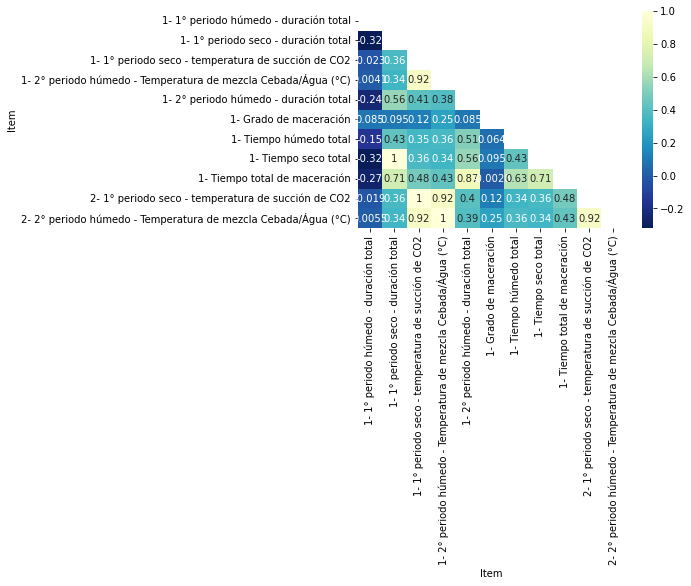

In [16]:
# Crear vector
mask = np.triu(np.ones_like(matriz, dtype = bool))

# Graficar
plt = sns.heatmap(matriz, mask = mask, annot = True, cmap = 'YlGnBu_r')
plt

In [17]:
#Leemos la base de datos de las cubas
Cubas_EX = pd.read_excel('Cubas.xlsx')
Cubas_EX.head(5)

,Equipamento,Número de lote,1- 1° periodo húmedo - duración total,1- 1° periodo seco - duración total,1- 1° periodo seco - temperatura de succión de CO2,1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C),1- 2° periodo húmedo - duración total,1- Grado de maceración,1- Tiempo húmedo total,1- Tiempo seco total,1- Tiempo total de maceración,2- 1° periodo seco - temperatura de succión de CO2,2- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)
0,Cubas,881345,4.33,10.00,25,22,0.0,37.3,0.0,10.00,0.00,24,21
1,NaN,881348,4.27,8.07,24,20,2.0,38.4,0.0,8.07,14.33,25,20
2,NaN,881351,0.00,0.00,0,0,0.0,0.0,0.0,0.00,0.00,0,0
3,NaN,881352,0.00,0.00,0,0,0.0,0.0,0.0,0.00,0.00,0,0
4,NaN,881355,14.37,0.00,0,0,0.0,38.5,0.0,0.00,0.00,0,0


In [25]:
Cubas2 = Cubas_EX[["1- 1° periodo húmedo - duración total",
                   "1- 1° periodo seco - duración total",
                   "1- 1° periodo seco - temperatura de succión de CO2",
                   "1- Tiempo seco total", 
                   "1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)",
                   "1- 2° periodo húmedo - duración total",
                   "1- Tiempo húmedo total",
                   "1- Tiempo total de maceración",
                   "1- Grado de maceración",
                   "2- 1° periodo seco - temperatura de succión de CO2",                  
                   "2- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)"]]

In [21]:
Cubas2.head(10)

,1- 1° periodo húmedo - duración total,1- 1° periodo seco - duración total,1- 1° periodo seco - temperatura de succión de CO2,1- Tiempo seco total,1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C),1- 2° periodo húmedo - duración total,1- Tiempo húmedo total,1- Tiempo total de maceración,1- Grado de maceración,2- 1° periodo seco - temperatura de succión de CO2,2- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)
0,4.33,10.00,25,10.00,22,0.0,0.0,0.00,37.3,24,21
1,4.27,8.07,24,8.07,20,2.0,0.0,14.33,38.4,25,20
2,0.00,0.00,0,0.00,0,0.0,0.0,0.00,0.0,0,0
3,0.00,0.00,0,0.00,0,0.0,0.0,0.00,0.0,0,0
4,14.37,0.00,0,0.00,0,0.0,0.0,0.00,38.5,0,0
5,4.00,8.00,0,8.00,0,2.0,0.0,14.00,37.0,0,0
6,14.33,0.00,0,0.00,0,0.0,0.0,0.00,37.2,0,0
7,5.00,8.00,28,8.00,22,2.0,0.0,15.00,0.0,27,22
8,5.00,8.00,26,8.00,23,2.0,7.0,15.00,39.9,26,23
9,5.00,13.42,28,13.42,24,2.0,7.0,15.00,38.5,28,24


In [22]:
#Importar MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Creamos el objeto 
scaler = MinMaxScaler()
#Hacer un dataframe con la transformación
pd.DataFrame(scaler.fit_transform(Cubas2),columns=Cubas2.columns,index=Cubas2.index)

,1- 1° periodo húmedo - duración total,1- 1° periodo seco - duración total,1- 1° periodo seco - temperatura de succión de CO2,1- Tiempo seco total,1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C),1- 2° periodo húmedo - duración total,1- Tiempo húmedo total,1- Tiempo total de maceración,1- Grado de maceración,2- 1° periodo seco - temperatura de succión de CO2,2- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)
0,0.247429,0.731707,0.735294,0.731707,0.916667,0.000000,0.000000,0.000000,0.927861,0.705882,0.875000
1,0.244000,0.637561,0.705882,0.637561,0.833333,0.359066,0.000000,0.651364,0.955224,0.735294,0.833333
2,0.000000,0.243902,0.000000,0.243902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.243902,0.000000,0.243902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.821143,0.243902,0.000000,0.243902,0.000000,0.000000,0.000000,0.000000,0.957711,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
113,0.800000,0.243902,0.705882,0.243902,0.833333,0.000000,0.000000,0.000000,0.893035,0.705882,0.833333
114,0.818857,0.243902,0.588235,0.243902,0.875000,0.000000,0.000000,0.000000,0.935323,0.558824,0.875000
115,0.247429,0.634146,0.000000,0.634146,0.000000,0.359066,0.000000,0.651364,0.935323,0.000000,0.000000
116,0.285714,0.634146,0.676471,0.634146,0.791667,0.359066,0.777778,0.681818,0.937811,0.676471,0.791667


In [26]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 
from sklearn.preprocessing import StandardScaler
#Crea objeto
scaler = StandardScaler()
#Hacer un dataframe con la transformación
pd.DataFrame(scaler.fit_transform(Cubas2),columns=Cubas2.columns,index=Cubas2.index)

,1- 1° periodo húmedo - duración total,1- 1° periodo seco - duración total,1- 1° periodo seco - temperatura de succión de CO2,1- Tiempo seco total,1- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C),1- 2° periodo húmedo - duración total,1- Tiempo húmedo total,1- Tiempo total de maceración,1- Grado de maceración,2- 1° periodo seco - temperatura de succión de CO2,2- 2° periodo húmedo - Temperatura de mezcla Cebada/Água (°C)
0,-0.423714,0.918160,0.519053,0.918160,0.706505,-1.255646,-0.911024,-1.438445,0.400611,0.426213,0.580623
1,-0.438923,0.420548,0.415593,0.420548,0.463096,0.510656,-0.911024,0.510392,0.481734,0.529910,0.459145
2,-1.521322,-1.660143,-2.067445,-1.660143,-1.970995,-1.255646,-0.911024,-1.438445,-2.350170,-2.062520,-1.970413
3,-1.521322,-1.660143,-2.067445,-1.660143,-1.970995,-1.255646,-0.911024,-1.438445,-2.350170,-2.062520,-1.970413
4,2.121319,-1.660143,-2.067445,-1.660143,-1.970995,-1.255646,-0.911024,-1.438445,0.489108,-2.062520,-1.970413
...,...,...,...,...,...,...,...,...,...,...,...
113,2.027528,-1.660143,0.415593,-1.660143,0.463096,-1.255646,-0.911024,-1.438445,0.297365,0.426213,0.459145
114,2.111179,-1.660143,0.001754,-1.660143,0.584801,-1.255646,-0.911024,-1.438445,0.422736,-0.092273,0.580623
115,-0.423714,0.402499,-2.067445,0.402499,-1.970995,0.510656,-0.911024,0.510392,0.422736,-2.062520,-1.970413
116,-0.253876,0.402499,0.312133,0.402499,0.341392,0.510656,0.960835,0.601510,0.430110,0.322516,0.337667
